In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets

from utils import compute_labels, log_likelihood, log_likelihood_from_labels
import clustering
# Automatically reload imports.
# %load_ext autoreload
# %autoreload 2

# Load and plot the data.

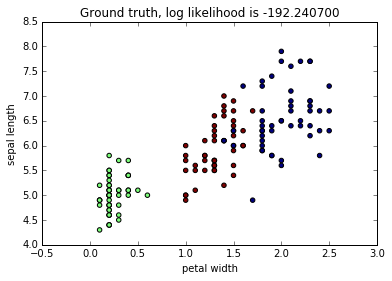

In [2]:
iris = datasets.load_iris()
# Leave just two features of the Iris dataset to simplify plotting and debugging.
X = iris.data[:, [3, 0]]
y = iris.target

# Plot ground truth and its log-likelihood.
y = np.choose(y, [1, 2, 0]).astype(np.float)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('Ground truth, log likelihood is %f' % log_likelihood_from_labels(X, y))

# K-Means from sklearn

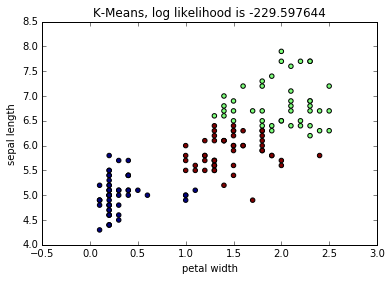

In [3]:
# Reproducibility.
np.random.seed(0)
est = sklearn.cluster.KMeans(n_clusters=3)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('K-Means, log likelihood is %f' % log_likelihood_from_labels(X, y))

# Example implementation of random clusterer.

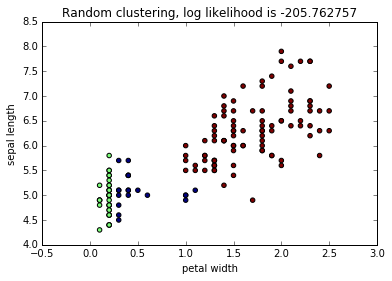

In [4]:
# Reproducibility.
np.random.seed(2)
est = clustering.Random(n_clusters=3)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('Random clustering, log likelihood is %f' % log_likelihood_from_labels(X, y))

# EM algorithm

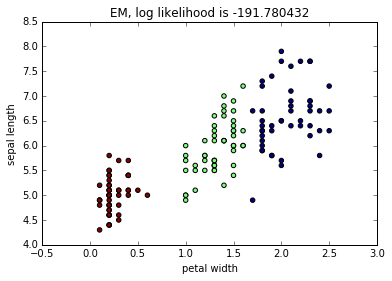

In [5]:
#####################################################################
# To run it, implement your own EM-algorithm class in clustering.py #
#####################################################################

np.random.seed(0)
est = clustering.EM(n_clusters=3, max_iter=100)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

# Convergence

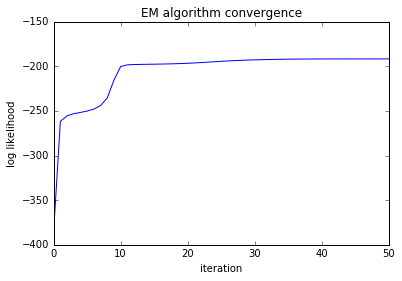

In [6]:
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('EM algorithm convergence')

In [7]:
%matplotlib qt
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation


fig = plt.figure()
ax = fig.add_subplot(111)
scat = ax.scatter(X[:, 0], X[:, 1], c=est.logs['labels'][0])
mu_labels = np.unique(est.logs['labels'][0])
mu_scat = ax.scatter(est.logs['mu'][0][:, 0], est.logs['mu'][0][:, 1], c=mu_labels, marker='x', s=50)
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')

def update_line(num):
    scat.set_array(est.logs['labels'][num])
    ll = log_likelihood(X, est.logs['w'][num], est.logs['mu'][num], est.logs['sigma'][num])
    mu_scat.set_offsets(est.logs['mu'][num])
#     mu_scat.set_data([], [])
    
    ax.set_title('EM, iter %d, log likelihood is %f' % (num, ll))
    return scat,# mu_scat

line_ani = animation.FuncAnimation(fig, update_line, len(est.logs['labels']),
    interval=1000, blit=False)


plt.show()

In [8]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

np.random.seed(3)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_3': sklearn.cluster.KMeans(n_clusters=3),
              'k_means_8': sklearn.cluster.KMeans(n_clusters=8),
              'em_iris_3': clustering.EM(n_clusters=3, n_init=100),
              'rand_iris_3': clustering.Random(n_clusters=3),}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    if hasattr(est, 'covars_'):
        ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
    else:
        ll = log_likelihood_from_labels(X, labels)
    ax.set_title('%s, %f' % (name, ll))
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground truth, %f' % log_likelihood_from_labels(X, y))
plt.show()